In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [293]:
#stałe

r=2
sigma=1.3
h=np.array([1,0.7,-0.05])
lam=np.array([4,5.5,7])
T=1
n=10000
R0=2
V0=20

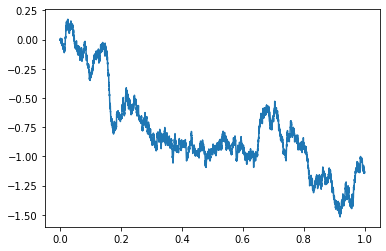

In [294]:
#proces Wienera


t=np.linspace(0,T,n)
dW=np.random.randn(n-1)
W=np.zeros(n)
for i in range(n-1):
    W[i+1]=W[i]+np.sqrt(T/(n+1))*dW[i]
plt.plot(t,W)

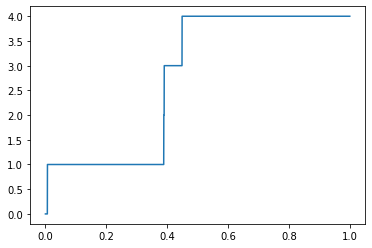

In [295]:
#procesy Poissona


NT=np.random.poisson(lam=lam)
NT
N=np.zeros((NT.size,t.size))
for i in range(NT.size):
    U=T*np.random.rand(NT[i])
    U=U.reshape(1,-1)
    t.reshape(-1,1)>U
    N[i,:]=np.sum(t.reshape(-1,1)>U,axis=1)
plt.plot(t,N[0])


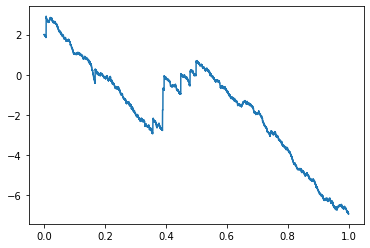

In [296]:
#proces R


R= R0+(r-np.sum(lam))*t+W*sigma+np.sum(h.reshape(-1,1)*N,axis=0)
plt.plot(t,R)

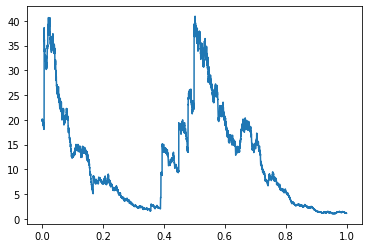

In [297]:
#proces V ze skokami deterministycznymi


V=V0*np.exp((r-1/2*sigma*sigma -np.sum(h*lam))*t+sigma*W)*np.prod((h.reshape(-1,1)+1)**N,axis=0)
plt.plot(t,V)